In [1]:
#Import Python Libraries

%matplotlib inline
import matplotlib.pyplot as plt
import xml.etree.ElementTree as etree 
from datetime import datetime, timedelta
import os
import json
import pandas as pd
import numpy as np
from pytz import common_timezones, all_timezones, timezone

In [3]:
#activity_file = "D:/downloads/activity_873783146.tcx" # Naul cycle with Barry
#activity_file = "D:/downloads/activity_898238015.tcx" # Great Dublin Cycle

# Define name and path of data file
# This data file contains a sub-set of activiy information relating to speed and time

input_file = 'activity_898238015.json' # Great Dublin Cycle
input_dir = os.path.join("/", "opt","jupyter","data","csv" )
input_file_path = os.path.join(input_dir , input_file)

print ("Input file is (full path)  ", input_file_path)



Input file is (full path)   /opt/jupyter/data/csv/activity_898238015.json


In [24]:
with open(input_file_path) as file_obj:
    i = 0
    for lines in file_obj:
        print(lines[:650])

{"data_points": [{"cadence": 76, "latitude": 53.36370773613453, "distance": 5.010000228881836, "heart_rate": 103, "time": "2015-09-13T06:25:51", "longitude": -6.190182846039534, "altitude": 79.4000015258789}, {"cadence": 83, "latitude": 53.363760793581605, "distance": 28.09000015258789, "heart_rate": 106, "time": "2015-09-13T06:25:56", "longitude": -6.190518541261554, "altitude": 90.80000305175781}, {"cadence": 84, "latitude": 53.36377898231149, "distance": 34.7400016784668, "heart_rate": 106, "time": "2015-09-13T06:25:57", "longitude": -6.1906137596815825, "altitude": 90.80000305175781}, {"cadence": 85, "latitude": 53.363817036151886, "dista


In [25]:
with open(input_file_path, 'r') as json_data:
    d = json.load(json_data)

In [45]:
df = pd.DataFrame.from_dict(d['data_points'])

In [28]:
# convert time field to Python datetime type
#df.time = pd.to_datetime(df.time)

In [37]:
# for cadence - if missing set to -1 so that we can investigate later
# convert this column to integer
#df.cadence = df.cadence.fillna(-1).astype('int')

In [46]:
df.head()

,altitude,cadence,distance,heart_rate,latitude,longitude,time
0,79.400002,76,5.010000,103,53.363708,-6.190183,2015-09-13T06:25:51
1,90.800003,83,28.090000,106,53.363761,-6.190519,2015-09-13T06:25:56
2,90.800003,84,34.740002,106,53.363779,-6.190614,2015-09-13T06:25:57
3,90.800003,85,40.650002,108,53.363817,-6.190668,2015-09-13T06:26:00
4,90.800003,87,52.090000,110,53.363877,-6.190771,2015-09-13T06:26:03


In [47]:
#check the data type conversions are good:
df.dtypes

altitude      float64
cadence       float64
distance      float64
heart_rate      int64
latitude      float64
longitude     float64
time           object
dtype: object

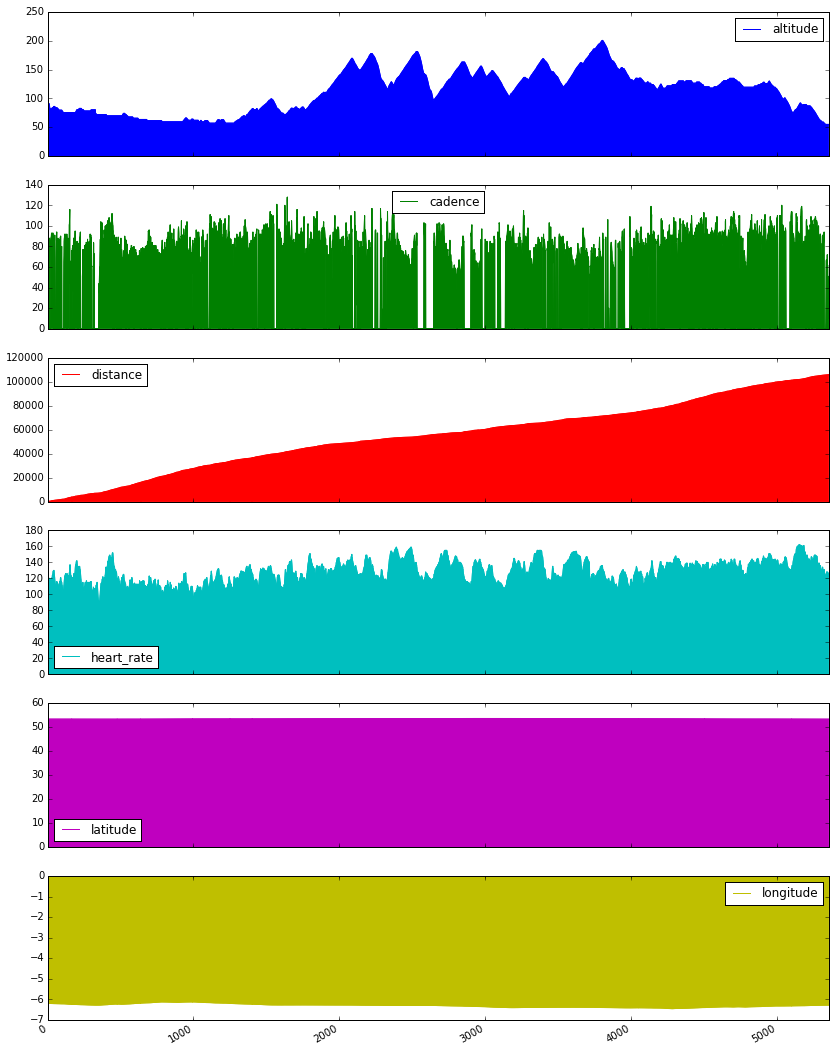

In [48]:
_ = df.plot(kind='area',
       subplots=True, 
        figsize=(14, 20),
        )

In [49]:
df.describe()

,altitude,cadence,distance,heart_rate,latitude,longitude
count,5358.000000,5312.000000,5347.000000,5358.000000,5347.000000,5347.000000
mean,111.955730,65.521273,55305.131840,128.561590,53.491536,-6.301922
std,36.721701,34.935758,28127.615377,13.721647,0.093893,0.083439
min,54.799999,0.000000,5.010000,85.000000,53.345526,-6.449606
25%,78.000000,57.000000,35449.244141,118.000000,53.397380,-6.381119
50%,119.400002,78.000000,56192.808594,129.000000,53.495561,-6.293268
75%,137.800003,89.000000,74205.464844,139.000000,53.577163,-6.258500
max,200.600006,128.000000,105730.960938,162.000000,53.625859,-6.122161


### Check altitude data

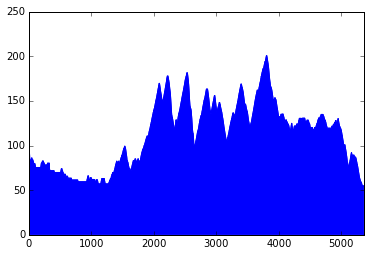

In [54]:
df.altitude.plot(kind = 'area')

In [41]:
df.altitude.count()

5358

In [42]:
len(df.altitude)

5358

In [44]:
df[ df.altitude.isnull() == True ]

,altitude,cadence,distance,heart_rate,latitude,longitude,time


### Check cadence

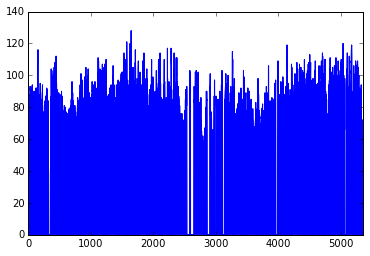

In [55]:
df.cadence.plot(kind = 'area')

In [61]:
df[ df.cadence.isnull() == True ].time.count()

46

In [63]:
df[ df.cadence.isnull() == True ].head()

,altitude,cadence,distance,heart_rate,latitude,longitude,time
109,75.400002,NaN,1977.489990,103,53.361328,-6.214706,2015-09-13T06:31:08
110,75.400002,NaN,1983.209961,106,53.361323,-6.214791,2015-09-13T06:31:10
238,80.400002,NaN,5270.680176,107,53.354209,-6.256836,2015-09-13T06:39:29
301,80.199997,NaN,6618.569824,111,53.350090,-6.273613,2015-09-13T06:43:35
302,80.199997,NaN,6628.750000,109,53.350090,-6.273765,2015-09-13T06:43:37


In [64]:
df.cadence.fillna(0, inplace = True)

In [65]:
df[ df.cadence.isnull() == True ].time.count()

0

In [62]:
df.cadence.dtype

dtype('float64')

In [66]:
df.cadence = df.cadence.astype('int')

In [67]:
df.cadence.dtype

dtype('int64')

In [68]:
df.cadence.describe()

count    5358.000000
mean       64.958753
std        35.306857
min         0.000000
25%        55.000000
50%        78.000000
75%        89.000000
max       128.000000
Name: cadence, dtype: float64